# P5: Segmentez des clients d'un site e-commerce
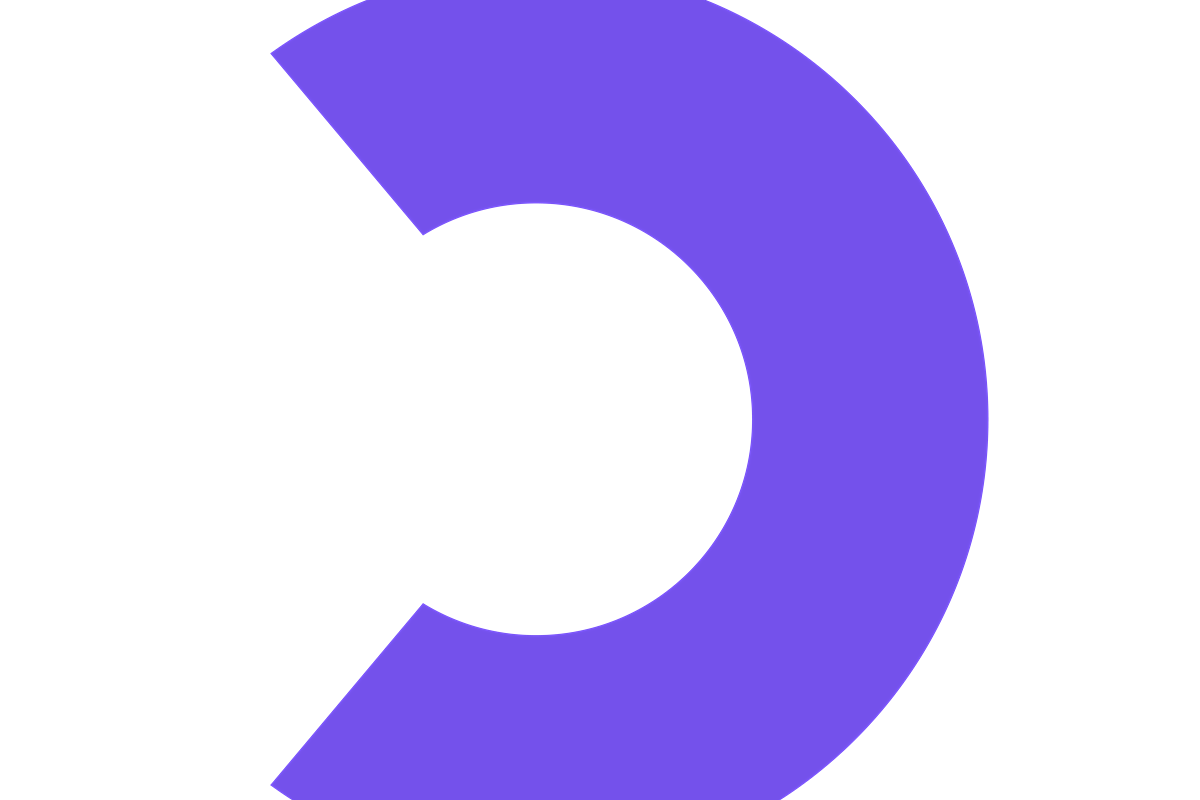

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from utils import *

# File system manangement
import os
import gc
import time

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# Importing dataset

## Data description

 A breaf explanation of the data and it's organization in different files can be seen in the following image:
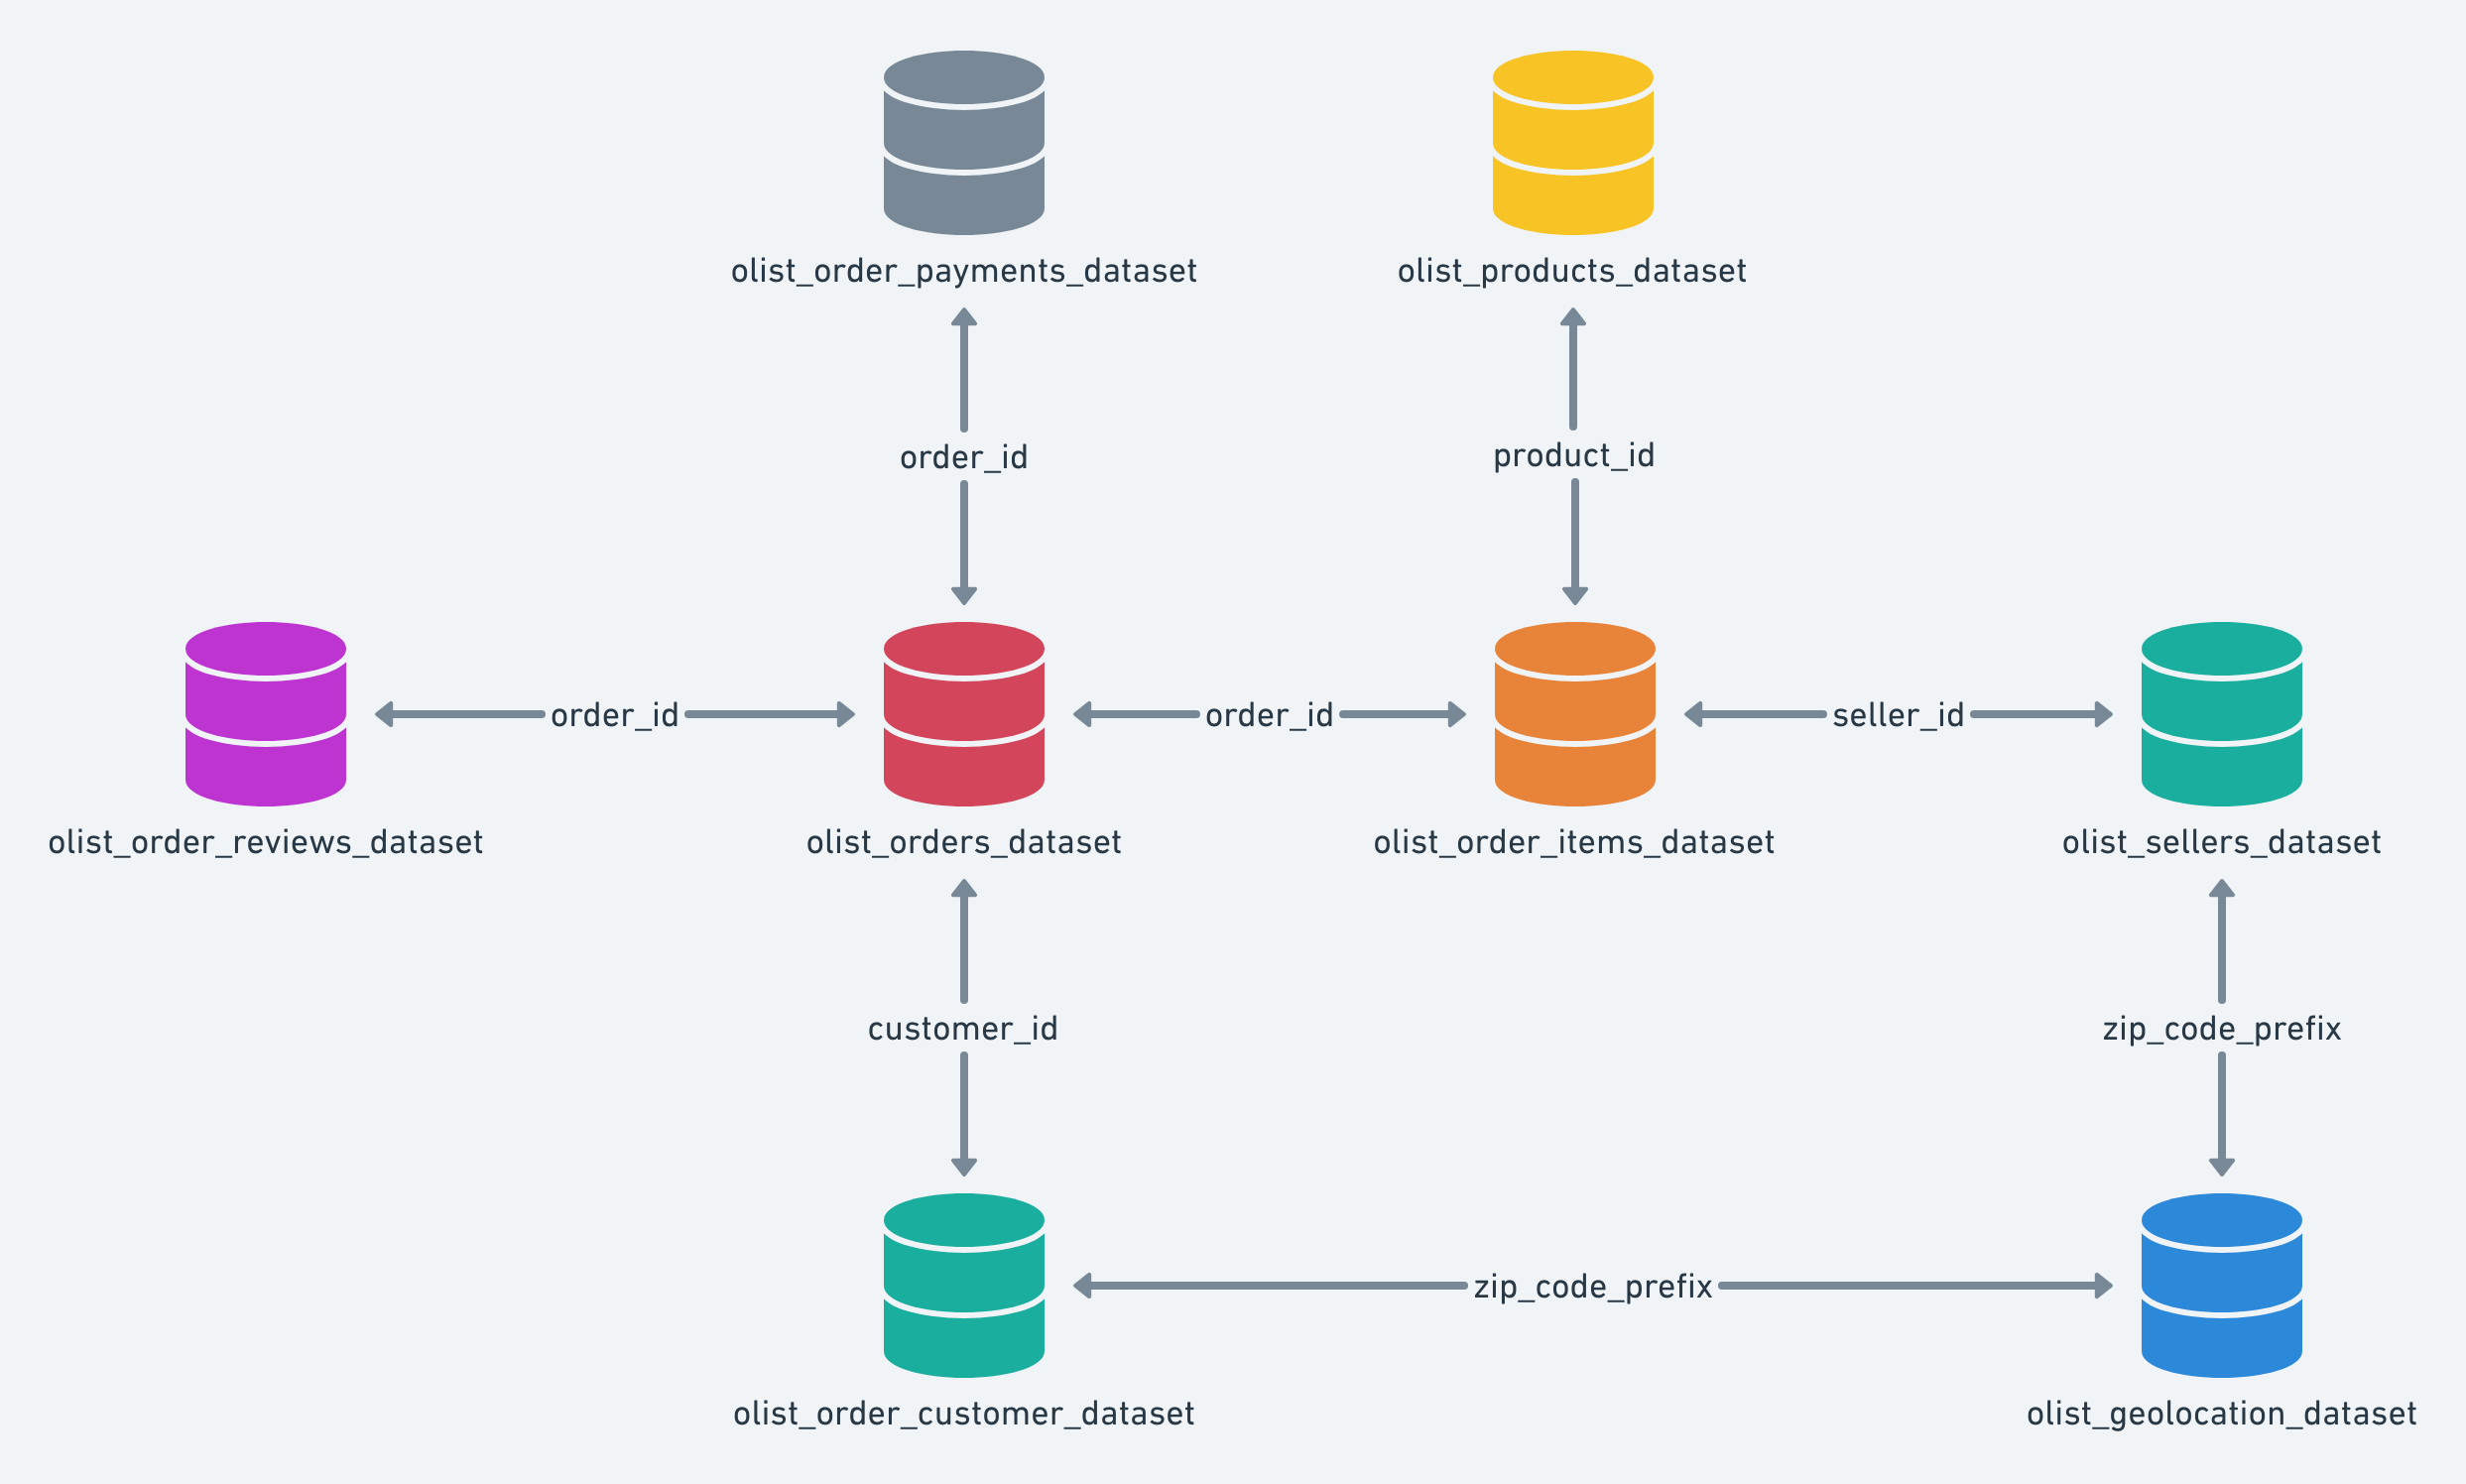

Know we list the different files in our data folder. 

In [2]:
# List files available
for file in os.listdir("data/"):
    if (file!='.DS_Store') & (file!='HRhd2Y0.png'):
        print(file)

olist_sellers_dataset.csv
product_category_name_translation.csv
olist_orders_dataset.csv
olist_order_items_dataset.csv
olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_products_dataset.csv


There are 9 files, 8 datasets and product_category_name_translation.csv, that we will see in future what it contains. Know load the files in dataframes.

In [3]:
olist_customers_dataset = pd.read_csv('data/olist_customers_dataset.csv')
olist_sellers_dataset = pd.read_csv('data/olist_sellers_dataset.csv')
olist_order_reviews_dataset = pd.read_csv('data/olist_order_reviews_dataset.csv')
olist_order_items_dataset = pd.read_csv('data/olist_order_items_dataset.csv')
olist_products_dataset = pd.read_csv('data/olist_products_dataset.csv')
olist_geolocation_dataset = pd.read_csv('data/olist_geolocation_dataset.csv')
product_category_name_translation = pd.read_csv('data/product_category_name_translation.csv')
olist_orders_dataset = pd.read_csv('data/olist_orders_dataset.csv')
olist_order_payments_dataset = pd.read_csv('data/olist_order_payments_dataset.csv')

Describing the obtained data frames

In [4]:
datasets = [olist_customers_dataset,
            olist_sellers_dataset,
            olist_order_reviews_dataset,
            olist_order_items_dataset,
            olist_products_dataset,
            olist_geolocation_dataset,
            product_category_name_translation,
            olist_orders_dataset,
            olist_order_payments_dataset]
titles = ["customers",
          "sellers",
          "reviews",
          "items", 
          "products",
          "geolocations", 
          "category_translation",
          "payments", 
          "orders"]

info_df = pd.DataFrame({},)
info_df['dataset']= titles

info_df['no_of_columns']= [len(df.columns) for df in datasets ]
info_df['columns_name']= [', '.join(list(df.columns)) for df in datasets] 
info_df['no_of_rows'] = [len(df) for df in datasets]

info_df.style.background_gradient(cmap='Blues')

,dataset,no_of_columns,columns_name,no_of_rows
0,customers,5,"customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state",99441
1,sellers,4,"seller_id, seller_zip_code_prefix, seller_city, seller_state",3095
2,reviews,7,"review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",99224
3,items,7,"order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value",112650
4,products,9,"product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",32951
5,geolocations,5,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state",1000163
6,category_translation,2,"product_category_name, product_category_name_english",71
7,payments,8,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",99441
8,orders,5,"order_id, payment_sequential, payment_type, payment_installments, payment_value",103886


In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

new_df = pd.DataFrame({},)
new_df['dataset']= titles
new_df['numeric_features'] = [len((df.select_dtypes(include=numerics)).columns) for df in datasets]
new_df['num_features_name'] = [', '.join(list((df.select_dtypes(include=numerics)).columns)) for df in datasets]
new_df['object_features'] = [len((df.select_dtypes(include='object')).columns) for df in datasets]
new_df['objt_features_name'] = [', '.join(list((df.select_dtypes(include='object')).columns)) for df in datasets]
new_df['bool_features'] = [len((df.select_dtypes(include='bool')).columns) for df in datasets]
new_df.style.background_gradient(cmap='Blues')

,dataset,numeric_features,num_features_name,object_features,objt_features_name,bool_features
0,customers,1,customer_zip_code_prefix,4,"customer_id, customer_unique_id, customer_city, customer_state",0
1,sellers,1,seller_zip_code_prefix,3,"seller_id, seller_city, seller_state",0
2,reviews,1,review_score,6,"review_id, order_id, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp",0
3,items,3,"order_item_id, price, freight_value",4,"order_id, product_id, seller_id, shipping_limit_date",0
4,products,7,"product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm",2,"product_id, product_category_name",0
5,geolocations,3,"geolocation_zip_code_prefix, geolocation_lat, geolocation_lng",2,"geolocation_city, geolocation_state",0
6,category_translation,0,,2,"product_category_name, product_category_name_english",0
7,payments,0,,8,"order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date",0
8,orders,3,"payment_sequential, payment_installments, payment_value",2,"order_id, payment_type",0


In [6]:
new_df.isnull().sum()

dataset               0
numeric_features      0
num_features_name     0
object_features       0
objt_features_name    0
bool_features         0
dtype: int64

Regarding the missing values in the datasets

In [7]:
print('olist_customers_dataset')
missing_values_table(olist_customers_dataset)
print('olist_sellers_dataset')
missing_values_table(olist_sellers_dataset)
print('olist_order_reviews_dataset')
missing_values_table(olist_order_reviews_dataset)
print('olist_order_items_dataset')
missing_values_table(olist_order_items_dataset)
print('olist_products_dataset')
missing_values_table(olist_products_dataset)
print('olist_geolocation_dataset')
missing_values_table(olist_geolocation_dataset)
print('product_category_name_translation')
missing_values_table(product_category_name_translation)
print('olist_orders_dataset')
missing_values_table(olist_orders_dataset)
print('olist_order_payments_dataset')
missing_values_table(olist_order_payments_dataset)

olist_customers_dataset
Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


olist_sellers_dataset
Your selected dataframe has 4 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


olist_order_reviews_dataset
Your selected dataframe has 7 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
review_comment_title,87656,88.3
review_comment_message,58247,58.7


olist_order_items_dataset
Your selected dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


olist_products_dataset
Your selected dataframe has 9 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
product_category_name,610,1.9
product_name_lenght,610,1.9
product_description_lenght,610,1.9
product_photos_qty,610,1.9
product_weight_g,2,0.0
product_length_cm,2,0.0
product_height_cm,2,0.0
product_width_cm,2,0.0


olist_geolocation_dataset
Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


product_category_name_translation
Your selected dataframe has 2 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


olist_orders_dataset
Your selected dataframe has 8 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
order_delivered_customer_date,2965,3.0
order_delivered_carrier_date,1783,1.8
order_approved_at,160,0.2


olist_order_payments_dataset
Your selected dataframe has 5 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


Observe the following 3 datasets contains missing values: ***olist_order_reviews_dataset, olist_products_dataset, olist_orders_dataset***

First we start to regard how it looks the olist_customers_dataset.

In [8]:
olist_customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [9]:
olist_customers_dataset.shape

(99441, 5)

There are 2 id columns and other 3 columns that we analyse next.

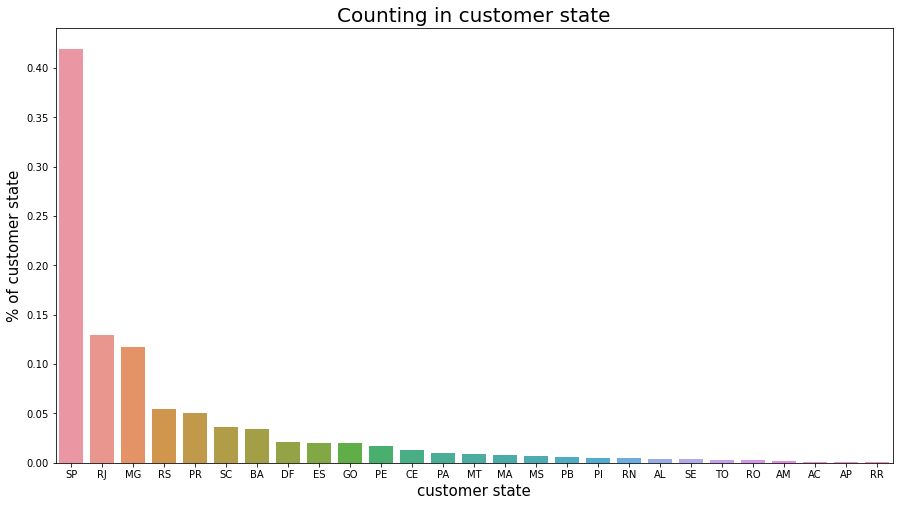

In [10]:
plot_count_col(olist_customers_dataset, col= 'customer_state', label_col='customer state')

As we can see, the most number of customer come from state code `SP`, followed by `RJ` and `MG`, which are all situated in the SouthEast region of Brazil.

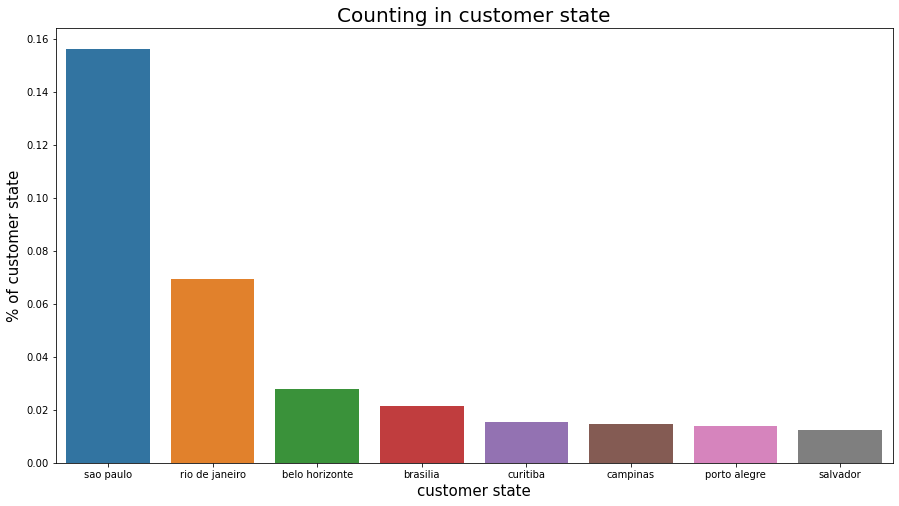

In [11]:
plot_count_col(olist_customers_dataset, col= 'customer_city', label_col='customer state', top=8)

Next we regard how it looks the olist_sellers_dataset.

In [12]:
olist_sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [13]:
olist_sellers_dataset.shape

(3095, 4)

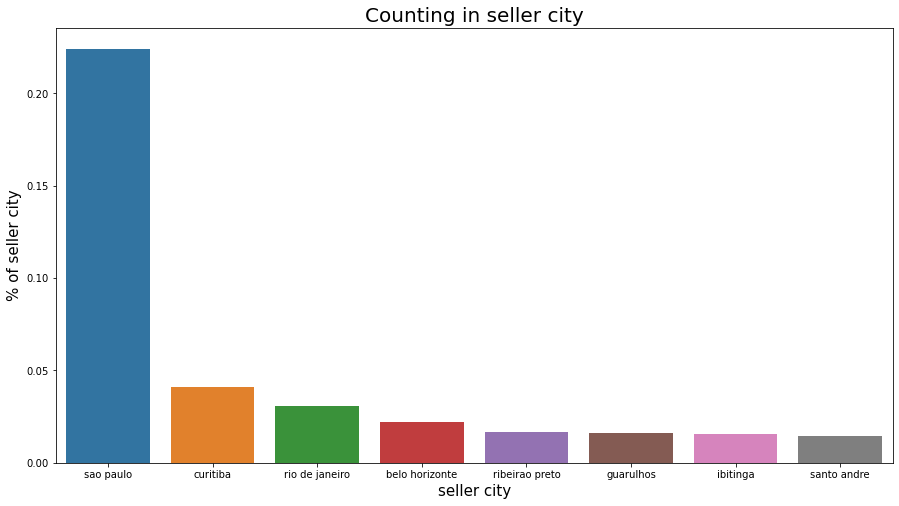

In [14]:
plot_count_col(olist_sellers_dataset, col= 'seller_city', label_col='seller city', top=8)

Next we regard how it looks the olist_orders_dataset.

In [15]:
olist_orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [16]:
olist_orders_dataset.shape

(99441, 8)

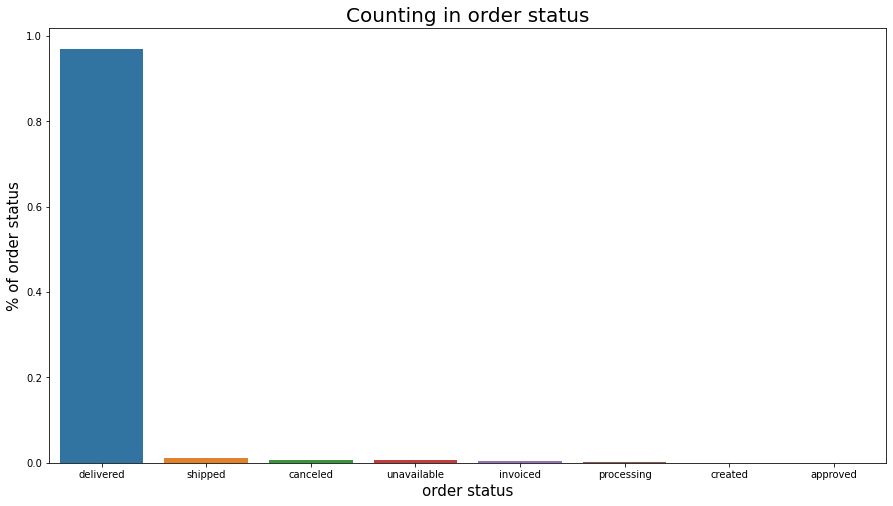

In [17]:
plot_count_col(olist_orders_dataset, col= 'order_status', label_col='order status')

In [18]:
olist_order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [19]:
olist_order_reviews_dataset.shape

(99224, 7)

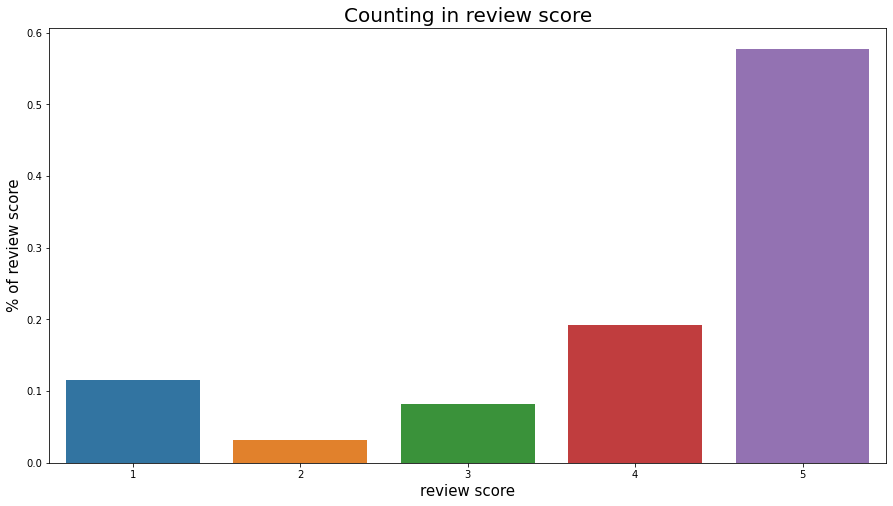

In [20]:
plot_count_col(olist_order_reviews_dataset, col= 'review_score', label_col='review score')

We can see, most customers are satisfied with the service and have given 4 and 5 ratings accordingly. 
However we can see many customers have given a raitng of 1, which means that they are dissapointed with the service.

Your selected dataframe has 7 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
review_comment_title,87656,88.3
review_comment_message,58247,58.7


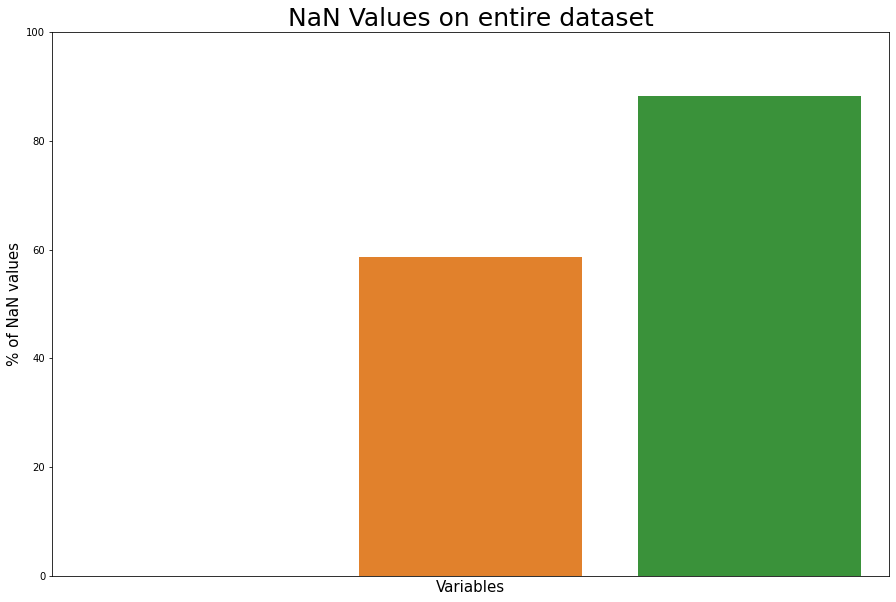

In [21]:
plot_nan_in_pourcent_from_data(olist_order_reviews_dataset)
# Missing values statistics
missing_values = missing_values_table(olist_order_reviews_dataset)
missing_values.head()

In [22]:
olist_order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [23]:
olist_order_items_dataset.shape

(112650, 7)

In [24]:
olist_products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [25]:
olist_products_dataset.shape

(32951, 9)

Your selected dataframe has 9 columns.
There are 8 columns that have missing values.


,Missing Values,% of Total Values
product_category_name,610,1.9
product_name_lenght,610,1.9
product_description_lenght,610,1.9
product_photos_qty,610,1.9
product_weight_g,2,0.0


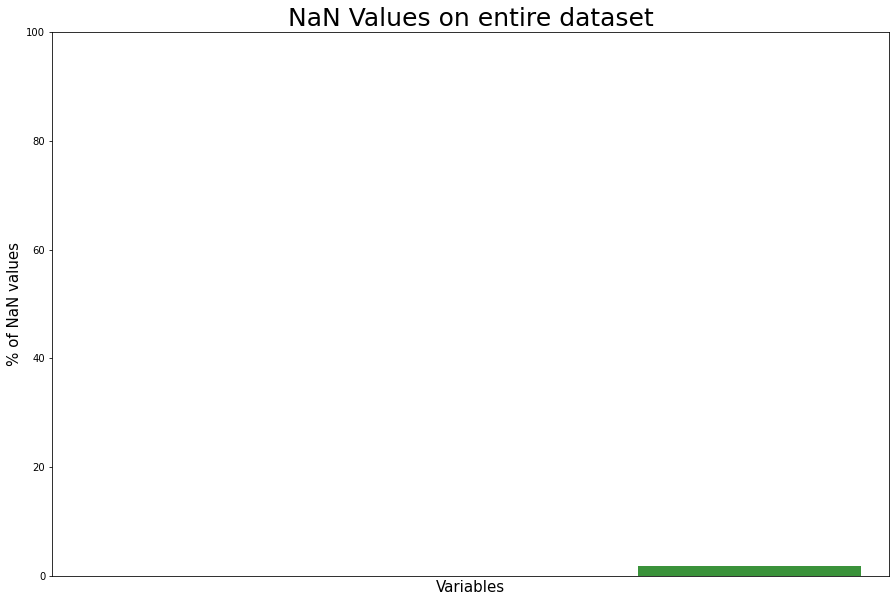

In [26]:
plot_nan_in_pourcent_from_data(olist_products_dataset)
# Missing values statistics
missing_values = missing_values_table(olist_products_dataset)
missing_values.head()

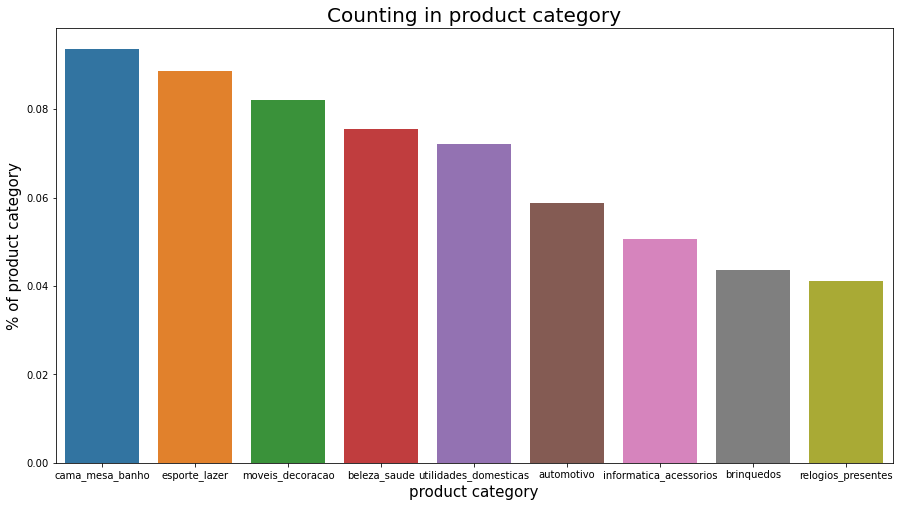

In [27]:
plot_count_col(olist_products_dataset, col= 'product_category_name', label_col='product category', top=9)

In [28]:
olist_products_dataset.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


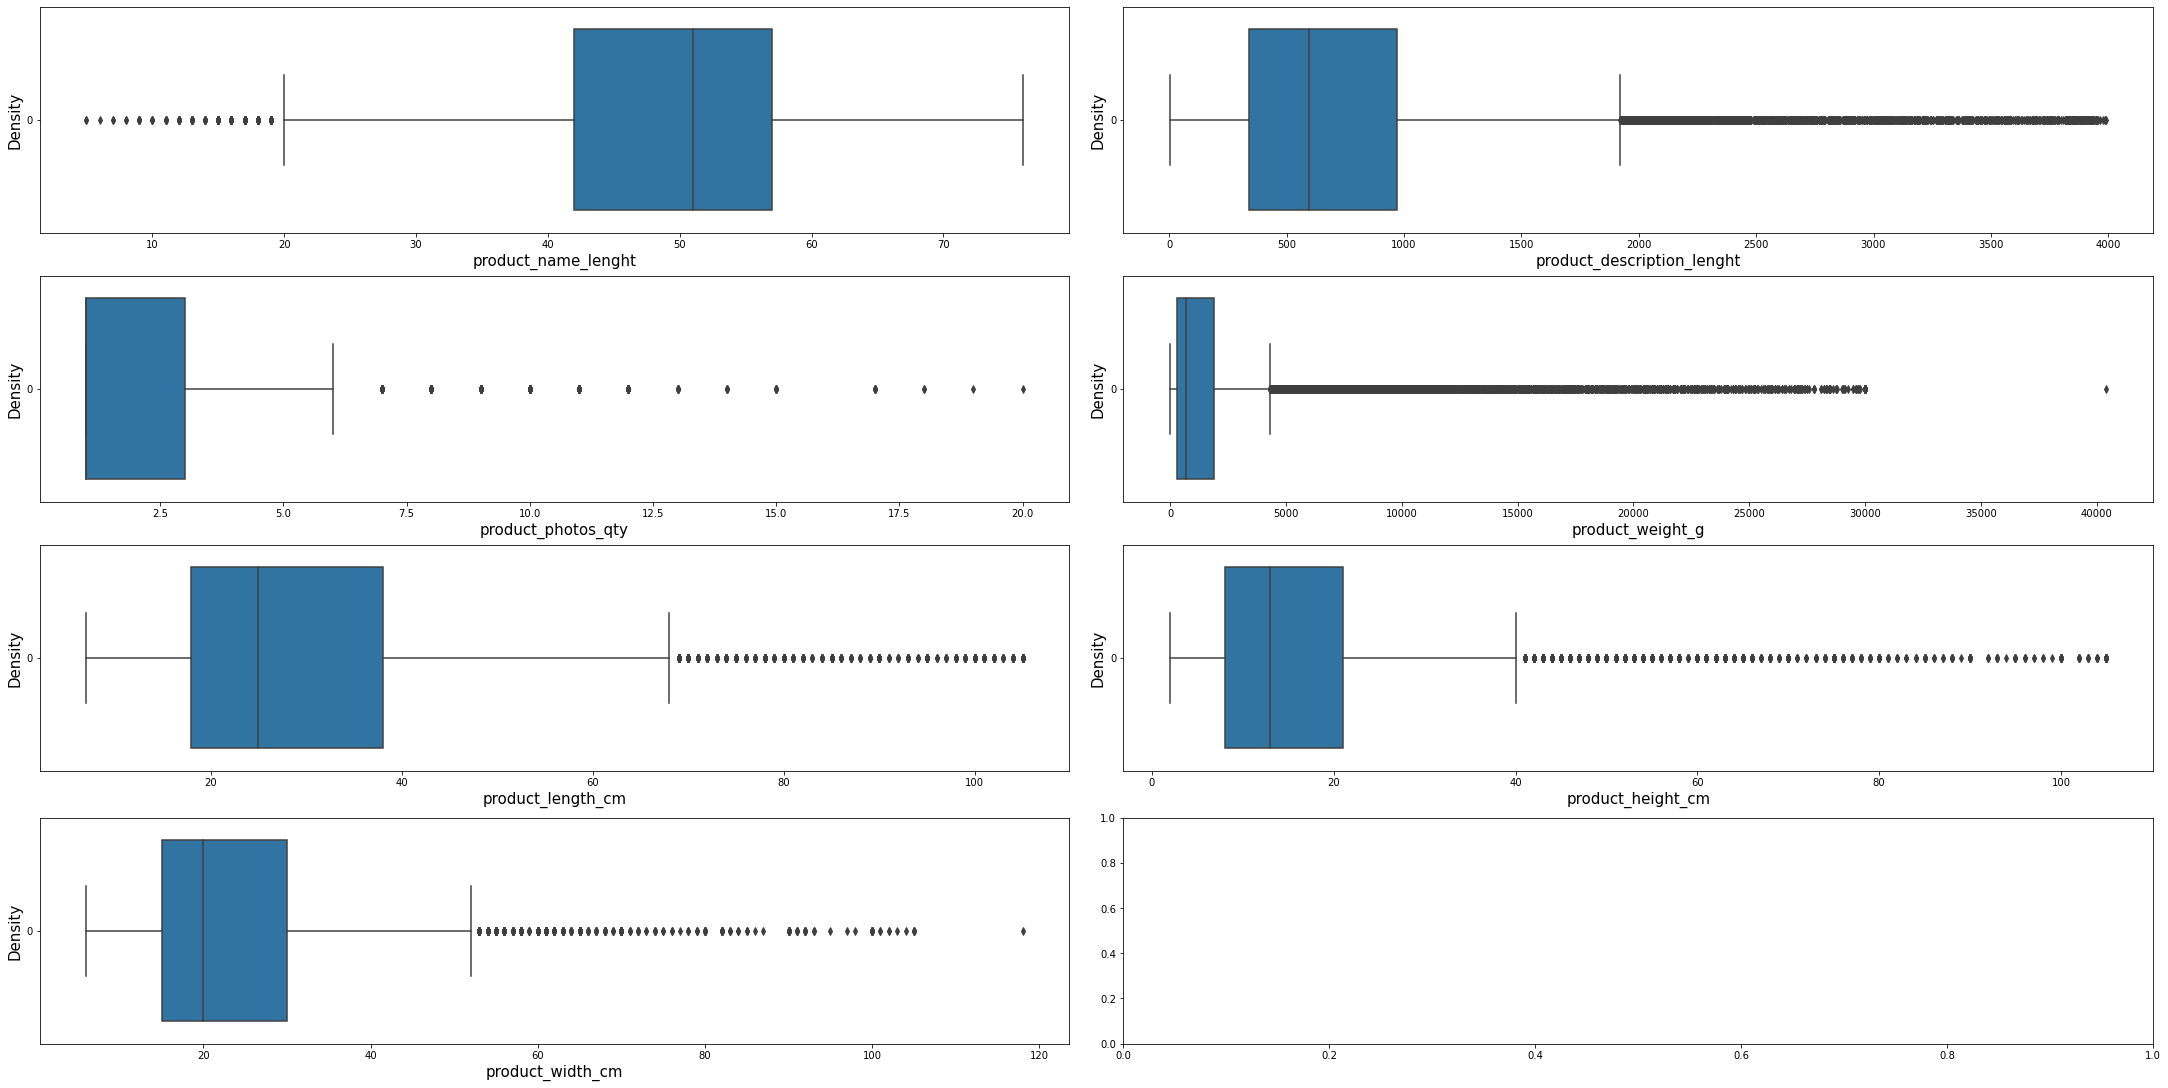

In [29]:
cols = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 
        'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
plot_density(olist_products_dataset, columns = cols, dt = DensityTypes.Boxplot)

In [30]:
olist_geolocation_dataset.head()
olist_geolocation_dataset.shape

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


(1000163, 5)

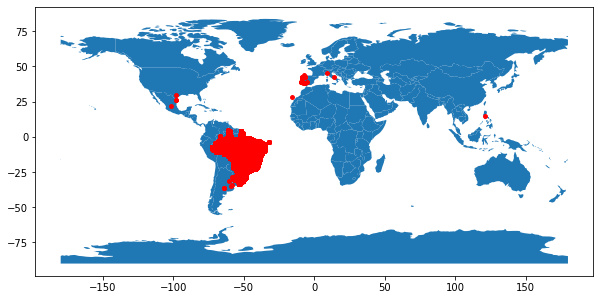

In [31]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(olist_geolocation_dataset['geolocation_lng'], olist_geolocation_dataset['geolocation_lat'])]
gdf = GeoDataFrame(olist_geolocation_dataset, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

We can see, most of the orders come from Brazilian cities, however, there are a few orders which come from North America, Europe, and Asia.

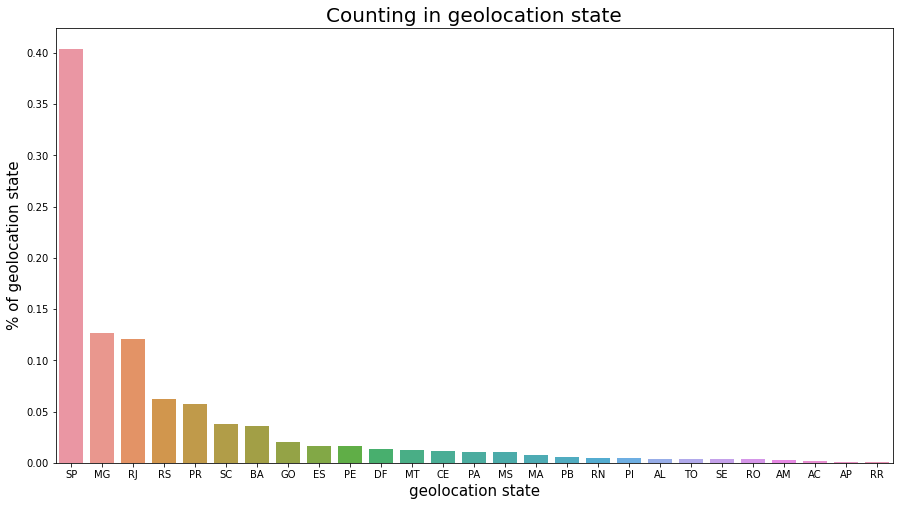

In [32]:
plot_count_col(olist_geolocation_dataset, col= 'geolocation_state', label_col='geolocation state')

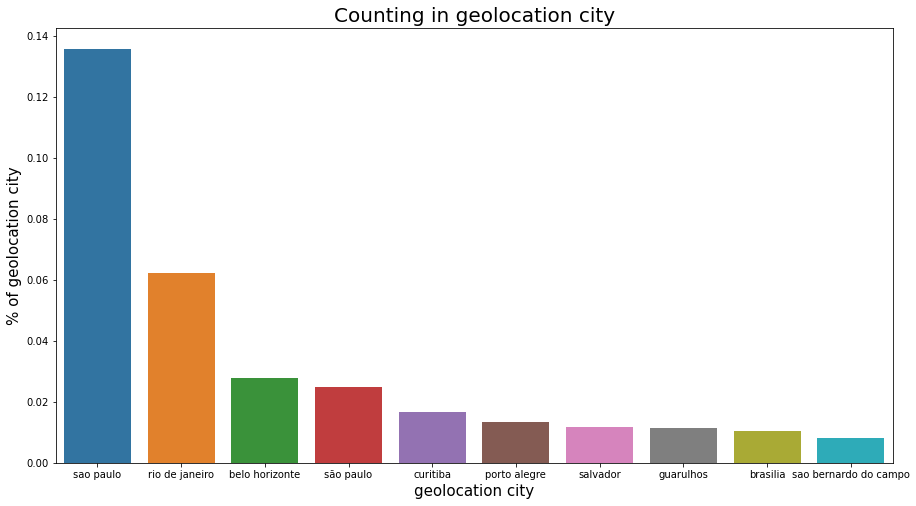

In [33]:
plot_count_col(olist_geolocation_dataset, col= 'geolocation_city', label_col='geolocation city', top=10)

In [34]:
product_category_name_translation.head()
product_category_name_translation.shape

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


(71, 2)

In [35]:
olist_order_payments_dataset.head()
olist_order_payments_dataset.shape

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


(103886, 5)

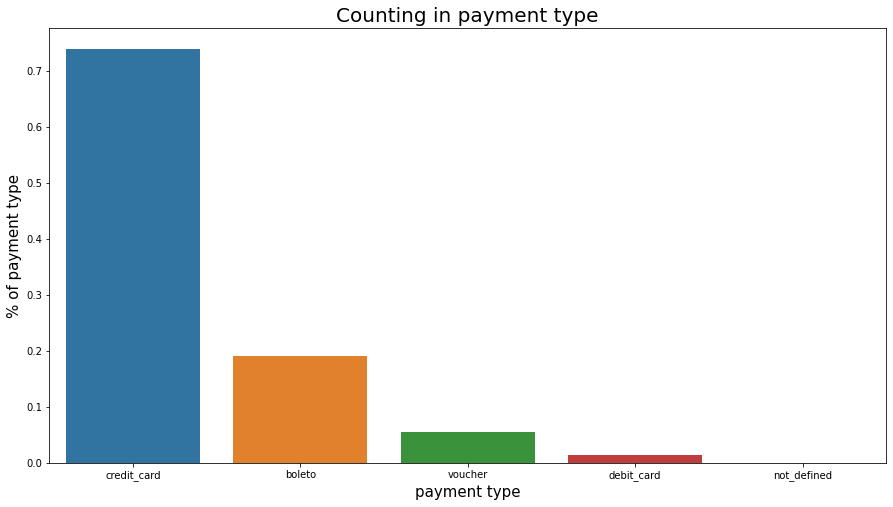

In [36]:
plot_count_col(olist_order_payments_dataset, col= 'payment_type', label_col='payment type')

In [37]:
olist_order_payments_dataset.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

# Cleaning the datasets

We observed `olist_order_payments_datase`, has non defined `payment_type`, therefore we will eliminate theese values.

In [38]:
# removing not_defined payment method
olist_order_payments_dataset = olist_order_payments_dataset.loc[olist_order_payments_dataset['payment_type']!='not_defined', :]

We saw that `olist_order_reviews_datase` contains two columns with lots of nan values. We choose to eliminate theese columns.

In [39]:
# dropping columns with many missing values
olist_order_reviews_dataset = olist_order_reviews_dataset.drop(columns=['review_comment_title', 'review_comment_message'])

We don't have lot of missing values in `olist_orders_dataset`, therefore we remove rows which have missing values using the dropna() function.

In [40]:
# dropping the missing values
olist_orders_dataset = olist_orders_dataset.dropna()

In [41]:
# convert date to datetime format
olist_orders_dataset[['order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date']] = olist_orders_dataset[['order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date']]\
        .apply(lambda x: pd.to_datetime(x,errors = 'coerce', format='%Y-%m-%d %H:%M:%S'))\
        .apply(lambda x: x.dt.date)\
        .astype('datetime64')

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


# RFM Data

In [42]:
from datetime import timedelta
last_date = olist_orders_dataset['order_delivered_carrier_date'].max() + timedelta(days=1)

Let's join order data with payments and aggregate recency, frequency and monetary columns

In [43]:
df = olist_orders_dataset.merge(olist_order_payments_dataset, how='inner', on=['order_id'])

 - Recency : number of days after the last purchase of the client
 - Frequency : number of purchases of the customer
 - Monetary : average amount of customer purchases

In [44]:
rfm_data = df.groupby('customer_id').agg(
                 r = ('order_delivered_carrier_date', lambda x: (last_date - x.max()).days),
                 f = ('payment_sequential', 'count'),
                 m = ('payment_value', 'mean')).reset_index()
rfm_data.columns =['customer_id','recency','frequency','monetary']

In [45]:
rfm_data.head()

,customer_id,recency,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,299,1,114.74
1,000161a058600d5901f007fab4c27140,420,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,560,1,195.42
3,0002414f95344307404f0ace7a26f1d5,389,1,179.35
4,000379cdec625522490c315e70c7a9fb,161,1,107.01


In [46]:
rfm_data.describe()

,recency,frequency,monetary
count,96460.000000,96460.000000,96460.000000
mean,250.422662,1.044360,157.213510
std,152.568149,0.369635,216.172543
min,1.000000,1.000000,1.737500
25%,127.000000,1.000000,60.097500
50%,231.000000,1.000000,103.140000
75%,359.000000,1.000000,174.332500
max,704.000000,26.000000,13664.080000


In [47]:
rfm_data.shape

(96460, 4)

<Figure size 2160x576 with 0 Axes>

<Figure size 2160x576 with 0 Axes>

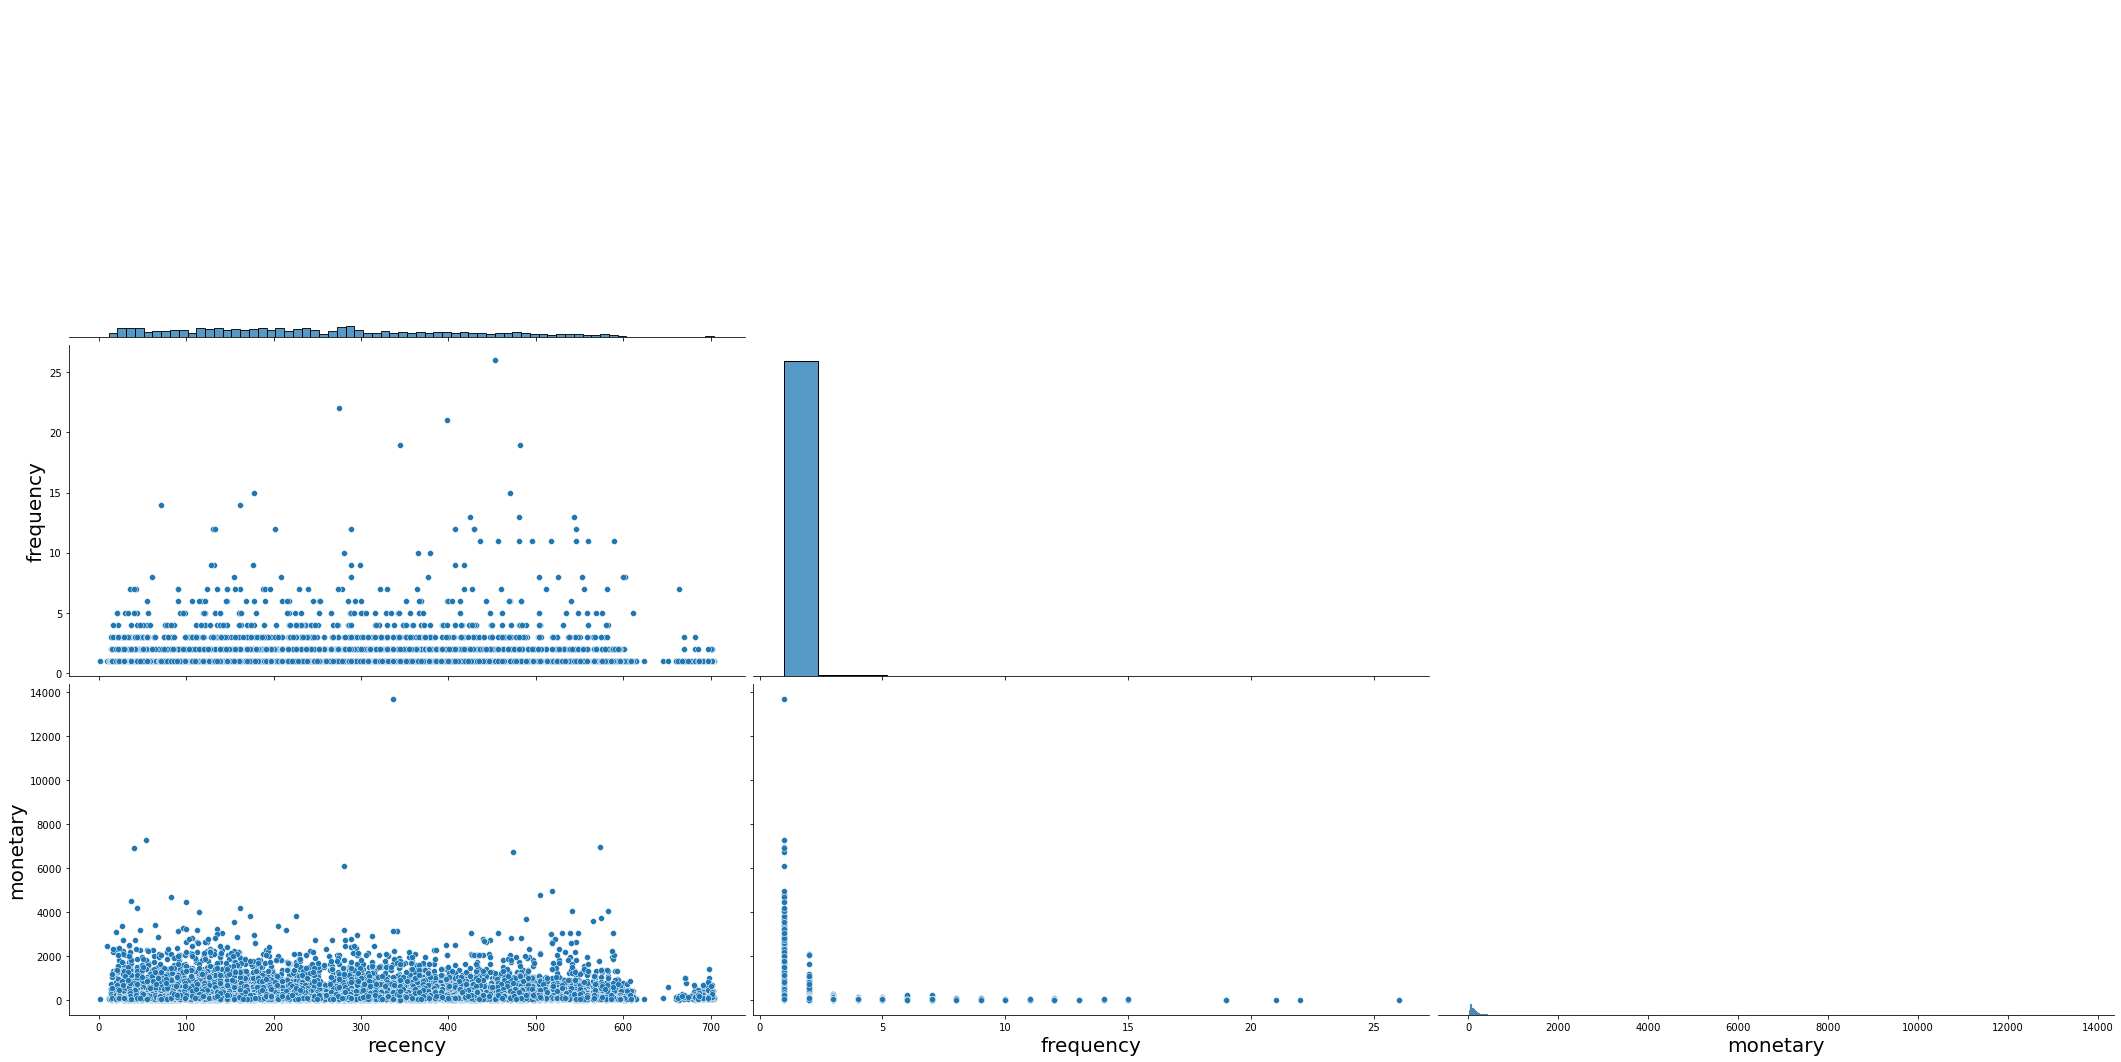

In [48]:
with sns.plotting_context(rc={"axes.labelsize":20}):
    plt.figure(figsize=(30,8));
    a=sns.pairplot(rfm_data, corner=True, height=5, aspect=2);

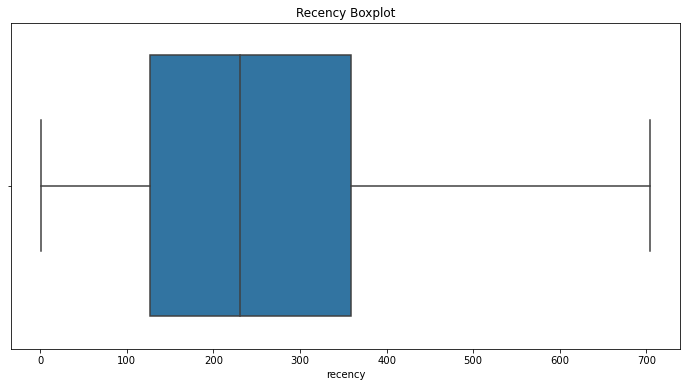

In [49]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='recency', data=rfm_data)
plt.title('Recency Boxplot');

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


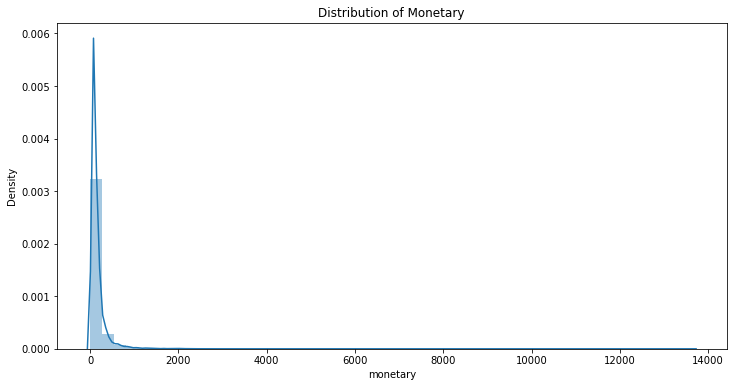

In [50]:
plt.figure(figsize=(12, 6))
plt.title('Distribution of Monetary')
sns.distplot(rfm_data.monetary);

It seems it could be favorable to remove the outliers here.

In [51]:
rfm_data['monetary'].describe([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    96460.000000
mean       157.213510
std        216.172543
min          1.737500
25%         60.097500
50%        103.140000
75%        174.332500
90%        301.313000
95%        439.785500
99%       1037.223600
max      13664.080000
Name: monetary, dtype: float64

95% percentile should be used to drop the outliers.

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


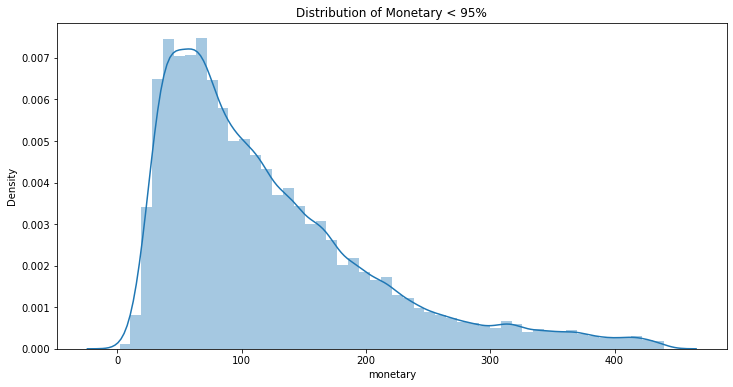

In [52]:
plt.figure(figsize=(12, 6))
plt.title('Distribution of Monetary < 95%')
sns.distplot(rfm_data[rfm_data['monetary']<440].monetary);

In [53]:
rfm_data = rfm_data[rfm_data['monetary'] < 447]

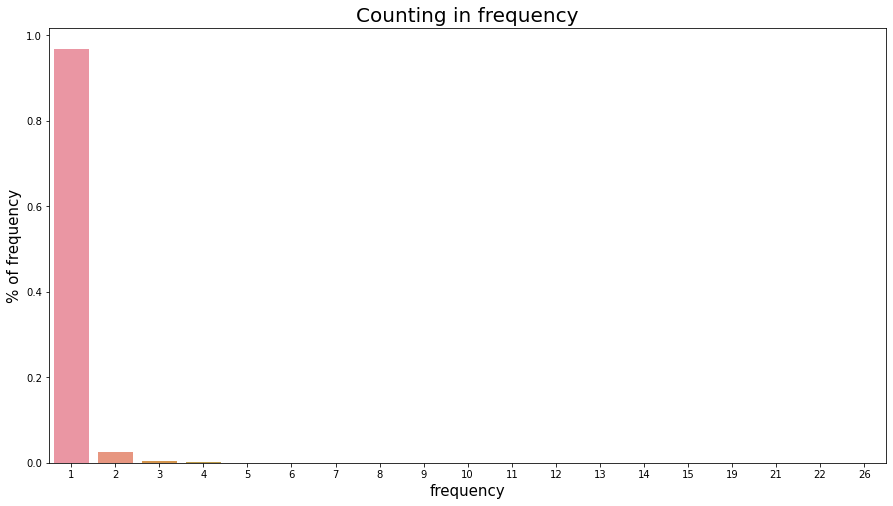

In [54]:
plot_count_col(rfm_data, 'frequency', label_col=None)

In [55]:
rfm_data.frequency.value_counts(normalize=True)*100

1     96.921937
2      2.465503
3      0.321540
4      0.113356
5      0.056678
6      0.038149
7      0.030519
8      0.010900
11     0.008720
12     0.008720
9      0.007630
10     0.003270
13     0.003270
15     0.002180
19     0.002180
14     0.002180
21     0.001090
26     0.001090
22     0.001090
Name: frequency, dtype: float64

 - We can see that about 97% customers made only one one purchase.
 - The average amount of purcheses is about 157.

One possibility is to rank the RFM columns to `k`segments. In this case, say: `k=10`.

In [56]:
rfm_data.loc[:,'r'] = np.round(rfm_data.recency.rank(pct = True)*10)
rfm_data.loc[:,'f'] = np.round(rfm_data.frequency.rank(pct = True)*10)
rfm_data.loc[:,'m'] = np.round(rfm_data.monetary.rank(pct = True)*10)
rfm_data.head()

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,customer_id,recency,frequency,monetary,r,f,m
0,00012a2ce6f8dcda20d059ce98491703,299,1,114.74,7.0,5.0,6.0
1,000161a058600d5901f007fab4c27140,420,1,67.41,8.0,5.0,3.0
2,0001fd6190edaaf884bcaf3d49edf079,560,1,195.42,10.0,5.0,8.0
3,0002414f95344307404f0ace7a26f1d5,389,1,179.35,8.0,5.0,8.0
4,000379cdec625522490c315e70c7a9fb,161,1,107.01,3.0,5.0,5.0


Another posibility is creating RFM groups by hand assigning scores for Recency and Monetary.

The used groups are 0-33, 33-66, 66-100 quantiles.

For Frequency we group them by hand sayng:
 - score=1 if the frequency value is 1
 - otherwise, the score will be 2

In [57]:
rfm_data.loc[:,'R_score'] = pd.qcut(rfm_data['recency'], 3, labels=[1, 2, 3]).astype(str)
rfm_data.loc[:,'M_score'] = pd.qcut(rfm_data['monetary'], 3, labels=[1, 2, 3]).astype(str)
rfm_data.loc[:,'F_score'] = rfm_data['frequency'].apply(lambda x: '1' if x==1 else '2')

rfm_data.loc[:,'RFM_score'] = rfm_data['R_score'] + rfm_data['F_score'] + rfm_data['M_score']

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [58]:
rfm_data.head()

,customer_id,recency,frequency,monetary,r,f,m,R_score,M_score,F_score,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,299,1,114.74,7.0,5.0,6.0,2,2,1,212
1,000161a058600d5901f007fab4c27140,420,1,67.41,8.0,5.0,3.0,3,1,1,311
2,0001fd6190edaaf884bcaf3d49edf079,560,1,195.42,10.0,5.0,8.0,3,3,1,313
3,0002414f95344307404f0ace7a26f1d5,389,1,179.35,8.0,5.0,8.0,3,3,1,313
4,000379cdec625522490c315e70c7a9fb,161,1,107.01,3.0,5.0,5.0,1,2,1,112


The segments will look like follows: 
- CORE - '123' - most recent, frequent, revenue generating - core customers that should be considered as most valuable clients
- GONE - '311', '312', '313' - gone, one-timers - those clients are probably gone;
- ROOKIE - '111', '112', '113' - just have joined - new clients that have joined recently
- WHALES - '323', '213', '223 - most revenue generating - whales that generate revenue
- LOYAL - '221', '222', '321', '322' - loyal users
- REGULAR - '121', '122', '211', '212', - average users - just regular customers that don't stand out

In [59]:
def segment(x):
    if x == '123':
        return 'Core'
    elif x in ['311', '312', '313']:
        return 'Gone'
    elif x in ['111', '112', '113']:
        return 'Rookie'
    elif x in ['323', '213', '223']:
        return 'Whales'
    elif x in ['221', '222', '321', '322']:
        return 'Loyal'
    else:
        return 'Regular'

/opt/anaconda3/envs/oc4/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


Rookie     32.772001
Gone       31.931637
Regular    21.988970
Whales     11.226647
Loyal       1.993547
Core        0.087197
Name: segments, dtype: float64

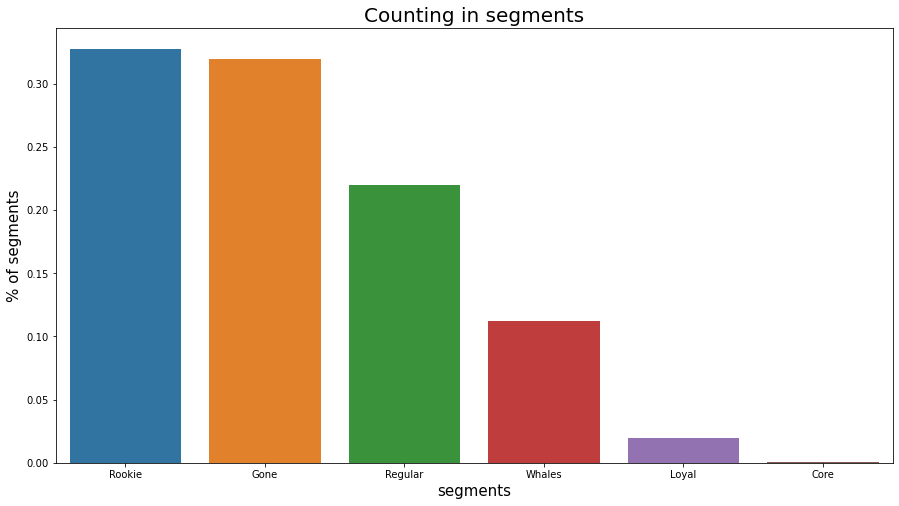

In [60]:
rfm_data.loc[:,'segments'] = rfm_data['RFM_score'].apply(segment)
rfm_data.loc[:,'segments'].value_counts(normalize=True)*100
plot_count_col(rfm_data, 'segments', label_col=None)

In [61]:
rfm_data.head()

,customer_id,recency,frequency,monetary,r,f,m,R_score,M_score,F_score,RFM_score,segments
0,00012a2ce6f8dcda20d059ce98491703,299,1,114.74,7.0,5.0,6.0,2,2,1,212,Regular
1,000161a058600d5901f007fab4c27140,420,1,67.41,8.0,5.0,3.0,3,1,1,311,Gone
2,0001fd6190edaaf884bcaf3d49edf079,560,1,195.42,10.0,5.0,8.0,3,3,1,313,Gone
3,0002414f95344307404f0ace7a26f1d5,389,1,179.35,8.0,5.0,8.0,3,3,1,313,Gone
4,000379cdec625522490c315e70c7a9fb,161,1,107.01,3.0,5.0,5.0,1,2,1,112,Rookie


In [62]:
segmentwise = rfm_data.groupby('segments').agg(RecencyMean = ('recency', 'mean'),
                                          FrequencyMean = ('frequency', 'mean'),
                                          MonetaryMean = ('monetary', 'mean'),
                                          GroupSize = ('recency', 'size'))
segmentwise

,RecencyMean,FrequencyMean,MonetaryMean,GroupSize
segments,,,,
Core,91.600000,2.187500,221.058690,80
Gone,431.046389,1.000000,122.328802,29296
Loyal,346.192455,2.562603,46.212722,1829
Regular,228.886537,1.053336,72.663897,20174
Rookie,88.926797,1.000000,124.593900,30067
Whales,235.699320,1.019320,218.976224,10300


<AxesSubplot:>

Text(0.5, 1.0, 'RFM Segments')

(0.0, 100.0, 0.0, 100.0)

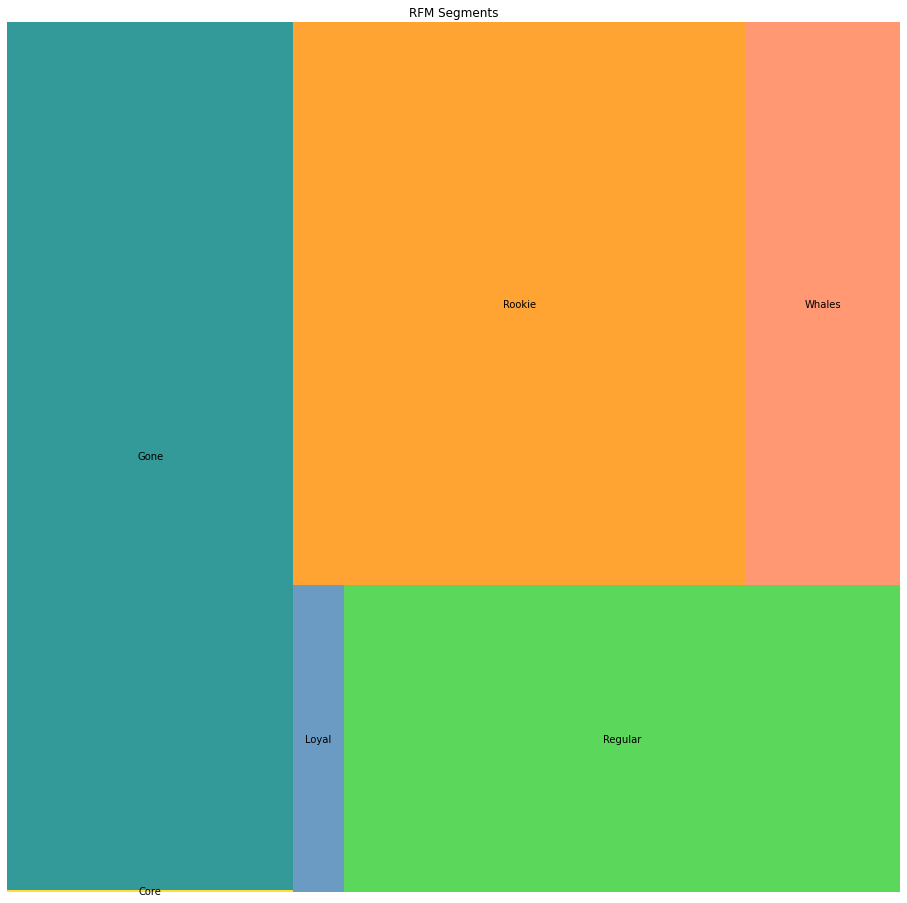

In [63]:
import squarify
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 16)
squarify.plot(sizes = segmentwise['GroupSize'], 
              label = segmentwise.index,
              color = ['gold', 'teal', 'steelblue', 'limegreen', 'darkorange', 'coral'],
              alpha = 0.8)
plt.title("RFM Segments")
plt.axis('off')
plt.show()

# Selecting the optimal number of clusters

In [64]:
rfm_data_clustering = rfm_data[['recency', 'frequency','monetary']]

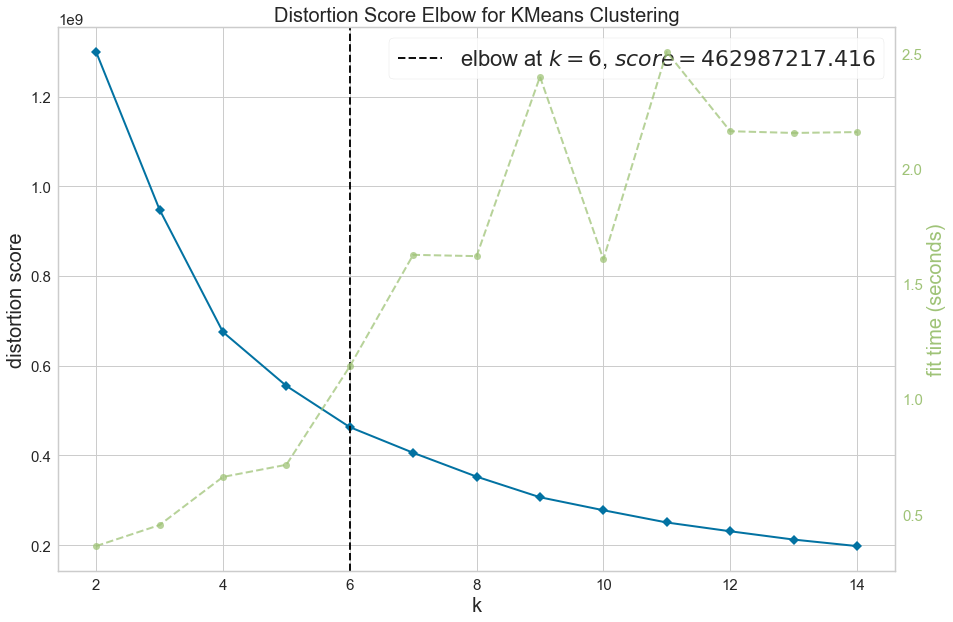

In [118]:
# Instantiate the clustering model and visualizer
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams['lines.linewidth'] = 2
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15) 
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))

vis = visualizer.fit(rfm_data_clustering);    # Fit the data to the visualizer

visualizer.poof();    # Draw/show/poof the data

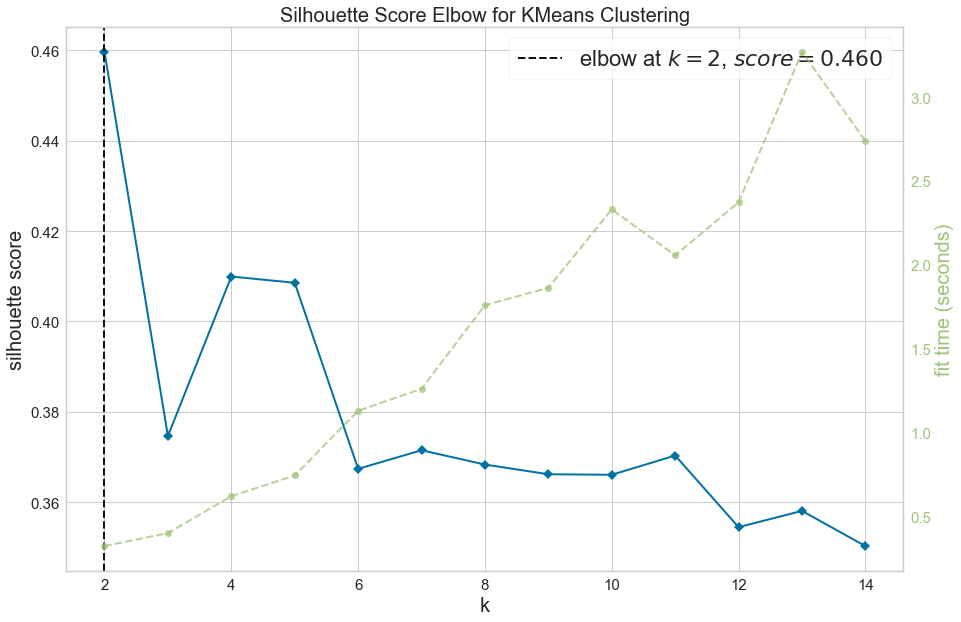

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [120]:
# Instantiate the clustering model and visualizer 
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), metric='silhouette', timings=True)

vis = visualizer.fit(rfm_data_clustering)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

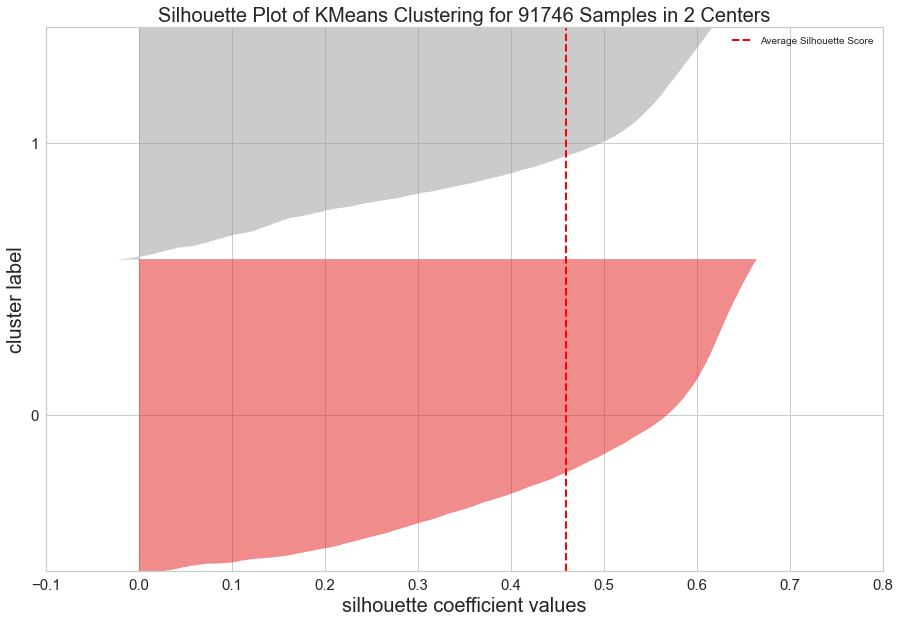

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 91746 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [122]:
# Instantiate the clustering model and visualizer 
model = KMeans(2)
visualizer = SilhouetteVisualizer(model)

vis = visualizer.fit(rfm_data_clustering)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

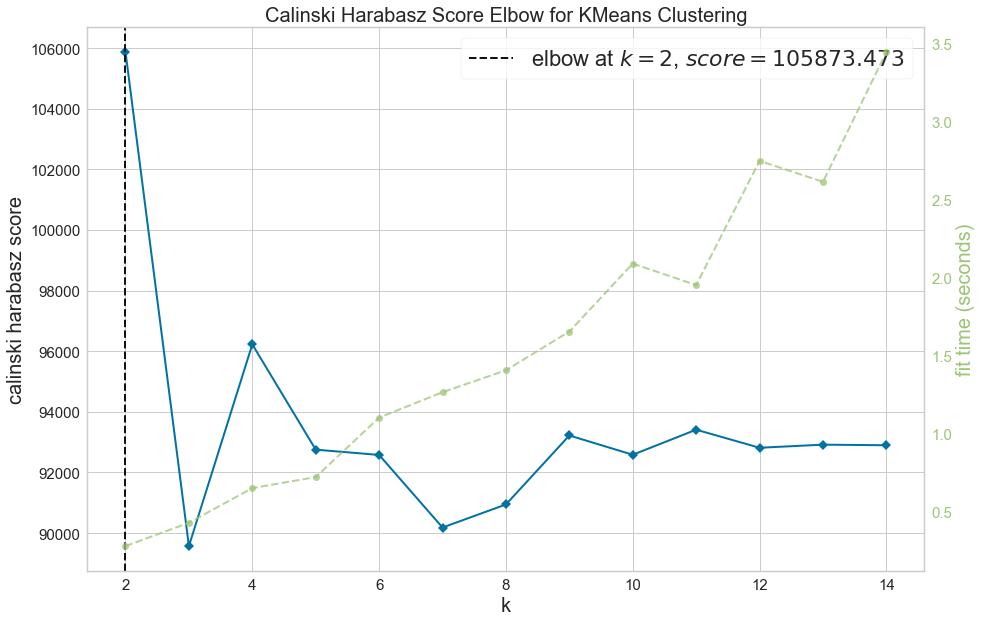

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [121]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15),metric='calinski_harabasz', timings= True)
vis = visualizer.fit(rfm_data_clustering)        # Fit the data to the visualizer
visualizer.poof()        # Finalize and render the figure

In [138]:
rfm_data_clustering

,recency,frequency,monetary
0,299,1,114.74
1,420,1,67.41
2,560,1,195.42
3,389,1,179.35
4,161,1,107.01
...,...,...,...
96455,179,1,91.91
96456,165,3,27.12
96457,110,1,63.13
96458,89,1,214.13


In [157]:
# BIC for GMM
from sklearn.mixture import GaussianMixture

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(rfm_data_clustering)
rfm_data_clustering_normalized = pd.DataFrame(std_scale.transform(rfm_data_clustering), columns=X.columns)

n_components = range(2, 15)
covariance_type = ['spherical', 'tied', 'diag', 'full']
score=[]
for cov in covariance_type:
    for n_comp in n_components:
        gmm=GaussianMixture(n_components=n_comp,covariance_type=cov);
        gmm.fit(rfm_data_clustering_normalized);
        score.append((cov,n_comp,gmm.bic(rfm_data_clustering_normalized),gmm.aic(rfm_data_clustering_normalized)));


GaussianMixture(covariance_type='spherical', n_components=2)

GaussianMixture(covariance_type='spherical', n_components=3)

GaussianMixture(covariance_type='spherical', n_components=4)

GaussianMixture(covariance_type='spherical', n_components=5)

GaussianMixture(covariance_type='spherical', n_components=6)

GaussianMixture(covariance_type='spherical', n_components=7)

GaussianMixture(covariance_type='spherical', n_components=8)

GaussianMixture(covariance_type='spherical', n_components=9)

GaussianMixture(covariance_type='spherical', n_components=10)

GaussianMixture(covariance_type='spherical', n_components=11)

GaussianMixture(covariance_type='spherical', n_components=12)

GaussianMixture(covariance_type='spherical', n_components=13)

GaussianMixture(covariance_type='spherical', n_components=14)

GaussianMixture(covariance_type='tied', n_components=2)

GaussianMixture(covariance_type='tied', n_components=3)

GaussianMixture(covariance_type='tied', n_components=4)

GaussianMixture(covariance_type='tied', n_components=5)

GaussianMixture(covariance_type='tied', n_components=6)

GaussianMixture(covariance_type='tied', n_components=7)

GaussianMixture(covariance_type='tied', n_components=8)

GaussianMixture(covariance_type='tied', n_components=9)

GaussianMixture(covariance_type='tied', n_components=10)

GaussianMixture(covariance_type='tied', n_components=11)

GaussianMixture(covariance_type='tied', n_components=12)

GaussianMixture(covariance_type='tied', n_components=13)

GaussianMixture(covariance_type='tied', n_components=14)

GaussianMixture(covariance_type='diag', n_components=2)

GaussianMixture(covariance_type='diag', n_components=3)

GaussianMixture(covariance_type='diag', n_components=4)

GaussianMixture(covariance_type='diag', n_components=5)

GaussianMixture(covariance_type='diag', n_components=6)

GaussianMixture(covariance_type='diag', n_components=7)

GaussianMixture(covariance_type='diag', n_components=8)

GaussianMixture(covariance_type='diag', n_components=9)

GaussianMixture(covariance_type='diag', n_components=10)

GaussianMixture(covariance_type='diag', n_components=11)

GaussianMixture(covariance_type='diag', n_components=12)

GaussianMixture(covariance_type='diag', n_components=13)

GaussianMixture(covariance_type='diag', n_components=14)

GaussianMixture(n_components=2)

GaussianMixture(n_components=3)

GaussianMixture(n_components=4)

GaussianMixture(n_components=5)

GaussianMixture(n_components=6)

GaussianMixture(n_components=7)

GaussianMixture(n_components=8)

GaussianMixture(n_components=9)

GaussianMixture(n_components=10)

GaussianMixture(n_components=11)

GaussianMixture(n_components=12)

GaussianMixture(n_components=13)

GaussianMixture(n_components=14)

In [155]:
score = pd.DataFrame(score, columns = ['cov_type', 'k', 'bic', 'aic'])

<AxesSubplot:xlabel='k', ylabel='bic'>

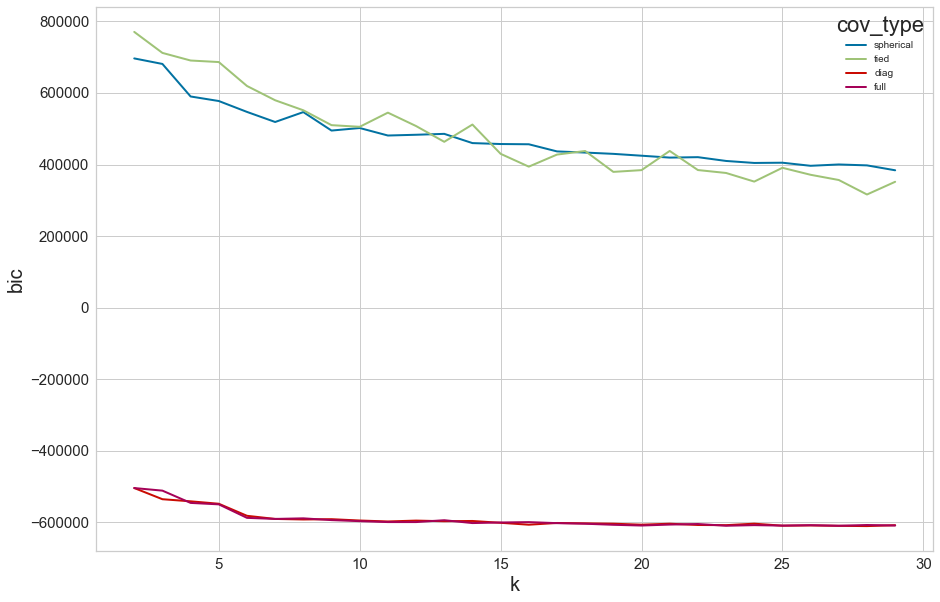

In [156]:
sns.lineplot(x="k", y="bic",
             hue="cov_type",
             data=score)# [score.cov_type=='full']

# Merging the dataset

After exploring and performing preprocessing on the datasets individually, we merge the datasets using multiple merge functions and common keys from the database schema. We use the 'inner' join strategy to avoid any missing values.

In [158]:
df = pd.merge(olist_orders_dataset, olist_order_payments_dataset, on='order_id', how='inner')
df = df.merge(olist_order_reviews_dataset, on='order_id', how='inner')
df = df.merge(olist_customers_dataset, on='customer_id', how='inner')
df = df.merge(olist_order_items_dataset, on='order_id', how='inner')
df = df.merge(olist_products_dataset, on='product_id', how='inner')
df = df.merge(olist_sellers_dataset, on='seller_id', how='inner')
df = df.merge(olist_geolocation_dataset, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')
del product_category_name_translation

In [159]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,geometry
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1,credit_card,...,13.0,9350,maua,SP,3149,-23.574809,-46.587471,sao paulo,SP,POINT (-46.58747 -23.57481)
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1,credit_card,...,13.0,9350,maua,SP,3149,-23.578333,-46.587123,sao paulo,SP,POINT (-46.58712 -23.57833)
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1,credit_card,...,13.0,9350,maua,SP,3149,-23.574809,-46.587471,sao paulo,SP,POINT (-46.58747 -23.57481)
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1,credit_card,...,13.0,9350,maua,SP,3149,-23.575033,-46.587451,sao paulo,SP,POINT (-46.58745 -23.57503)
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1,credit_card,...,13.0,9350,maua,SP,3149,-23.580054,-46.586673,sao paulo,SP,POINT (-46.58667 -23.58005)


In [160]:
df.shape

(17564173, 43)

Merging the dataset could cause some creation of dupplicates. So we clean the obtained dataset by removing the duplicates.

In [162]:
# dropping duplicate values
df = df.drop_duplicates()

The dataset is now ready for modelling.

In [163]:
df.shape

(12015122, 43)